# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [84]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 594
['port-aux-francais', 'hithadhoo', 'dunedin', 'al-`ula', 'waitangi', 'iskateley', 'tartagal', 'iqaluit', 'sisimiut', 'ribeira grande', 'illizi', 'grytviken', 'west island', 'saint-joseph', 'longyearbyen', 'edinburgh of the seven seas', 'uturoa', "la'ie", 'port mathurin', 'bathsheba', 'harnosand', 'uruzgan', 'invercargill', 'akhtubinsk', 'adamstown', 'la ronge', "arkhangel'sk", 'ishii', 'qamdo', 'lihue', 'alice town', 'necochea', 'bubaque', 'albany', 'berezovyy', 'papatowai', 'vilyuchinsk', 'ikovka', 'jamestown', 'inhambane', 'ouargaye', 'kingston', 'isle of lewis', 'nova vicosa', 'magadan', 'bredasdorp', 'sampit', 'mejit', 'tiksi', 'sivas', 'hadibu', 'codrington', 'nizhniy odes', 'porto novo', 'port douglas', 'la passe', 'maitum', 'camayenne', 'margaret river', 'keflavik', 'lorengau', 'blackwater', 'kupang', 'fale old settlement', 'blackmans bay', 'kismayo', 'puerto natales', 'midoun', 'nouadhibou', 'yellowknife', 'talas', 'quellon', 'sidi senoussi syd

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [85]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (response['weather'][0])

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"] - 273.15
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | dunedin
Processing Record 4 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | iskateley
Processing Record 7 of Set 1 | tartagal
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | illizi
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | saint-joseph
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | uturoa
Processing Record 18 of Set 1 | la'ie
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | bathsheba
Processing Record 21 of Set 1 | harnosand
Processing Reco

Processing Record 41 of Set 4 | bunia
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | kajiado
Processing Record 44 of Set 4 | utrik
Processing Record 45 of Set 4 | trincomalee
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | konarka
Processing Record 48 of Set 4 | lulea
Processing Record 49 of Set 4 | villa ojo de agua
Processing Record 0 of Set 5 | sitka
Processing Record 1 of Set 5 | qaqortoq
Processing Record 2 of Set 5 | mossel bay
Processing Record 3 of Set 5 | chingirlau
Processing Record 4 of Set 5 | stanley
Processing Record 5 of Set 5 | usol'ye-sibirskoye
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | port isabel
Processing Record 8 of Set 5 | kralendijk
Processing Record 9 of Set 5 | altamira
Processing Record 10 of Set 5 | pankrushikha
Processing Record 11 of Set 5 | kolonia town
Processing Record 12 of Set 5 | korhogo
Processing Record 13 of Set 5 | glace bay
Processing Record 14 of Set 5 | shimoda
Pro

Processing Record 34 of Set 8 | bardaskan
City not found. Skipping...
Processing Record 35 of Set 8 | narasannapeta
Processing Record 36 of Set 8 | baoying
Processing Record 37 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 38 of Set 8 | crucecita
Processing Record 39 of Set 8 | northam
Processing Record 40 of Set 8 | wynyard
Processing Record 41 of Set 8 | smithers
Processing Record 42 of Set 8 | thohoyandou
Processing Record 43 of Set 8 | paragominas
Processing Record 44 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 45 of Set 8 | gadzhiyevo
Processing Record 46 of Set 8 | port blair
Processing Record 47 of Set 8 | nacala
Processing Record 48 of Set 8 | noosa heads
Processing Record 49 of Set 8 | black point
Processing Record 0 of Set 9 | san carlos del zulia
Processing Record 1 of Set 9 | newman
Processing Record 2 of Set 9 | kassala
Processing Record 3 of Set 9 | prince rupert
Processing Record 4 of Set 9 | navolato
Processing Record 

Processing Record 21 of Set 12 | zangguy
City not found. Skipping...
Processing Record 22 of Set 12 | ouellah
City not found. Skipping...
Processing Record 23 of Set 12 | yanchep
Processing Record 24 of Set 12 | goure
Processing Record 25 of Set 12 | el bauga
Processing Record 26 of Set 12 | cooma
Processing Record 27 of Set 12 | uva
Processing Record 28 of Set 12 | nadi
Processing Record 29 of Set 12 | sayat
Processing Record 30 of Set 12 | nema
Processing Record 31 of Set 12 | nuku'alofa
Processing Record 32 of Set 12 | natchez
Processing Record 33 of Set 12 | khovd
Processing Record 34 of Set 12 | sydney
Processing Record 35 of Set 12 | zdolbuniv
Processing Record 36 of Set 12 | kimbe
Processing Record 37 of Set 12 | baki
Processing Record 38 of Set 12 | east ballina
Processing Record 39 of Set 12 | weining
Processing Record 40 of Set 12 | selfoss
Processing Record 41 of Set 12 | villers-cotterets
Processing Record 42 of Set 12 | flandes
Processing Record 43 of Set 12 | atherton
---

In [86]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [87]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.40,94,32,9.66,TF,1684745886
1,hithadhoo,-0.6000,73.0833,28.53,71,15,0.80,MV,1684745928
2,dunedin,-45.8742,170.5036,9.89,77,89,1.34,NZ,1684745961
3,waitangi,-43.9535,-176.5597,11.57,88,68,0.45,NZ,1684745895
4,iskateley,67.6803,53.1512,21.10,43,16,4.05,RU,1684745925


In [88]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [89]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.40,94,32,9.66,TF,1684745886
1,hithadhoo,-0.6000,73.0833,28.53,71,15,0.80,MV,1684745928
2,dunedin,-45.8742,170.5036,9.89,77,89,1.34,NZ,1684745961
3,waitangi,-43.9535,-176.5597,11.57,88,68,0.45,NZ,1684745895
4,iskateley,67.6803,53.1512,21.10,43,16,4.05,RU,1684745925


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

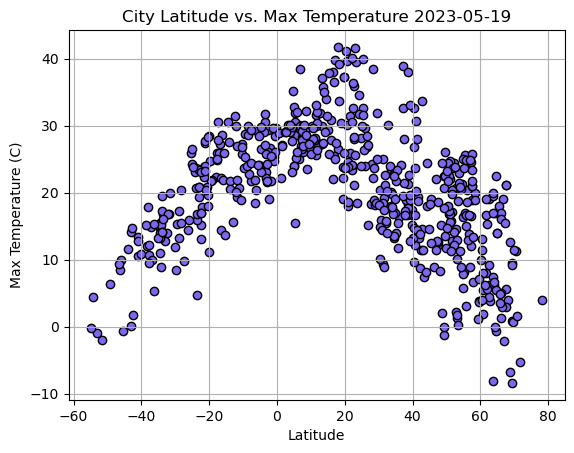

In [90]:
# Build scatter plot for latitude vs. temperature
lat_all = city_data_df["Lat"]
temp_all = city_data_df["Max Temp"]
plt.scatter(lat_all, temp_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature 2023-05-23")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

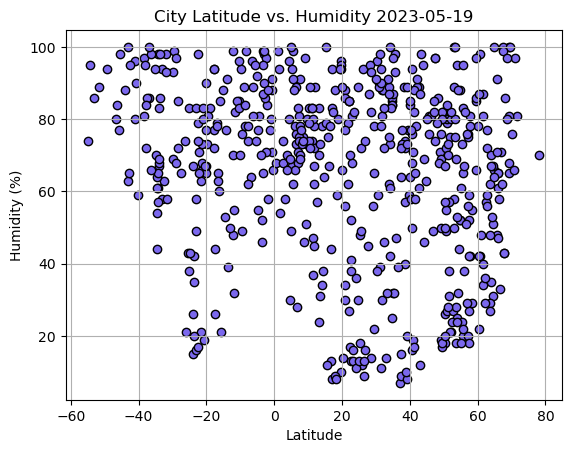

In [91]:
# Build the scatter plots for latitude vs. humidity
lat_all = city_data_df["Lat"]
humid_all = city_data_df["Humidity"]
plt.scatter(lat_all, humid_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

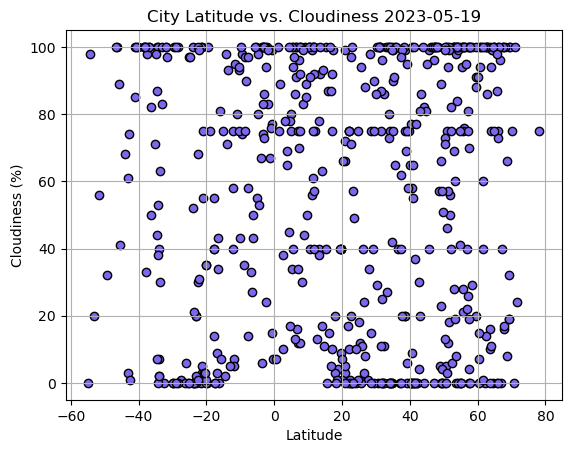

In [92]:
# Build the scatter plots for latitude vs. cloudiness
lat_all = city_data_df["Lat"]
cloud_all = city_data_df["Cloudiness"]
plt.scatter(lat_all, cloud_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

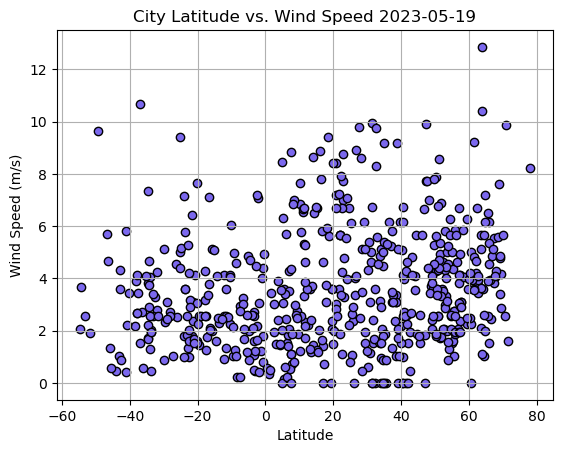

In [93]:
# Build the scatter plots for latitude vs. wind speed
lat_all = city_data_df["Lat"]
wind_all = city_data_df["Wind Speed"]
plt.scatter(lat_all, wind_all, edgecolors="black",facecolors="mediumslateblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed 2023-05-19")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [94]:
# Define a function to create Linear Regression plots

# Define model
def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create regression line and add to plot
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

# Calculate and plot Pearson's r value
    print(f"The r-value is: {rvalue}")
    
# Remaining graphical elements for all plots
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()
    
    return line_eq, rvalue

In [95]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,iskateley,67.6803,53.1512,21.10,43,16,4.05,RU,1684745925
6,iqaluit,63.7506,-68.5145,-8.15,62,100,5.66,CA,1684745891
7,sisimiut,66.9395,-53.6735,-2.21,71,0,4.87,GL,1684745970
8,ribeira grande,38.5167,-28.7000,18.21,72,20,3.09,PT,1684745887
9,illizi,26.4833,8.4667,26.89,9,24,3.38,DZ,1684745970


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.40,94,32,9.66,TF,1684745886
1,hithadhoo,-0.6000,73.0833,28.53,71,15,0.80,MV,1684745928
2,dunedin,-45.8742,170.5036,9.89,77,89,1.34,NZ,1684745961
3,waitangi,-43.9535,-176.5597,11.57,88,68,0.45,NZ,1684745895
5,tartagal,-22.5164,-63.8013,15.24,98,30,0.99,AR,1684746467


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7143771668256857


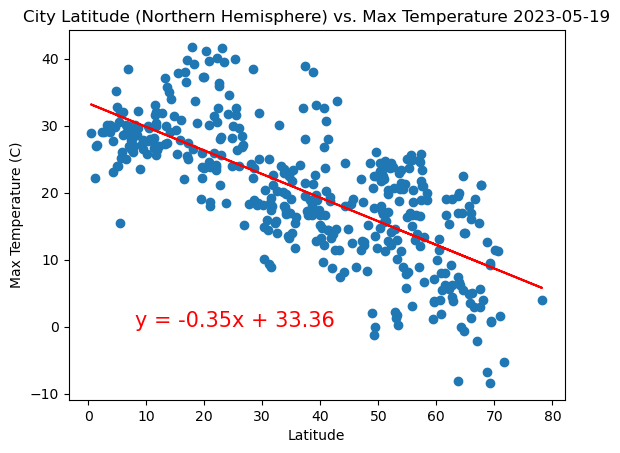

In [98]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

regEQplotX = 8
regEQplotY = 0

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Northern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (8, 0), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-value is: 0.8065912326120235


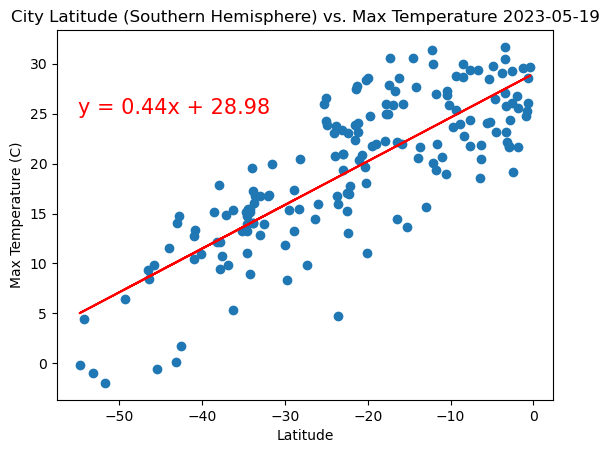

In [99]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

regEQplotX = -55
regEQplotY = 25

# Label the y axis
y_label = 'Max Temperature (C)'
plt.title("City Latitude (Southern Hemisphere) vs. Max Temperature 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 

It should be stated at the outset that the generalizability of the findings across all plots is limited because the plots represent a single day, 5/19/2023. Since the weather fluctuates in any locale, this day may exhibit atypical meteorological patterns in many places and thus not convey more enduring weather features. Analyzing data over time would address this small-n problem. I have endeavored to partly approximate this approach by running the code several times over four days: the hemispheric relationships between latitude and temperature remain noticeable and enduring, while lines of best fit for latitude vs. the other weather variables often differ in direction and r score, though each holding at a low absolute value. This meshes with my ultimate conclusion: *there is only a reliable correlation between latitude and temperature.*

Relying on the citipy dataset may overrepresent regions that have more major cities and correspondingly underrepresents those with fewer large cities or fewer cities in general. When "eyeballed", it appears that the longitude and latitude datapoints positions blanket the entire earth and there are many diverse datapoints, but there could be an urban bias that may be partially mitigated by weighting regions by the number and size of their cities. 

As for the latitude vs. temperature plots (in Celcius): There is a noticeable downward slope of the regression line for the northern hemisphere and an upward slope for the southern hemisphere, displaying a negative relationship between latitude and temperature for the former and a positive relationship for the latter. R values are extreme (-0.71 for the northern hemisphere, 0.81 for the southern hemisphere), showing that these relationships hold for the majority of the data. As mentioned in the introduction to this assignment, this makes sense because higher latitudes in the northern hemisphere are closer to the North Pole, where it is cold, while higher latitudes in the southern hemisphere are closer to the equator, where it tends to be warm.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.07836102332554906


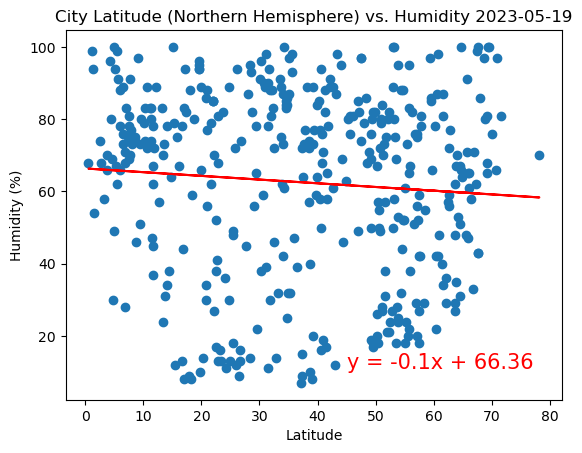

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

regEQplotX = 45
regEQplotY = 11

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Northern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (45, 11), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig7.png")

# Show the plot
plt.show()

The r-value is: -0.04878583925537347


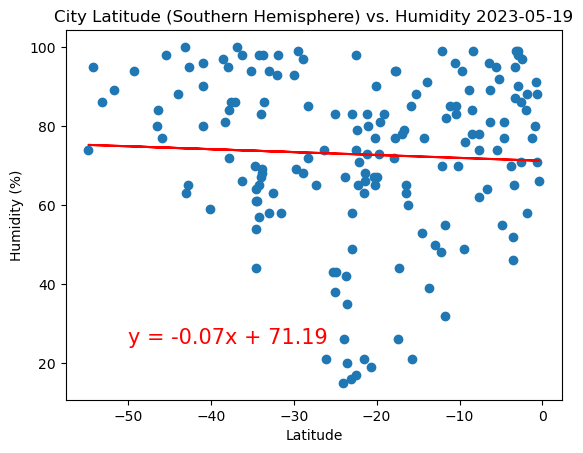

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regEQplotX = -50
regEQplotY = 25

# Label the y axis
y_label = 'Humidity (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Humidity 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:**

The lines of best fit for latitude vs. percent humidity for both hemispheres have slopes that are just a bit negative; the fact that the r scores are both less than the absolute value of 0.10 displays wide dispersion of the datapoints. On balance, there is no reliable relationship between latitude and humidity, particularly in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013476297188583354


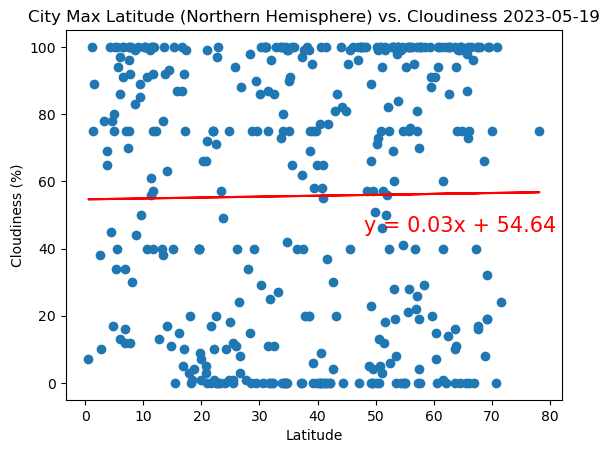

In [102]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regEQplotX = 48
regEQplotY = 45

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Max Latitude (Northern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (48, 45), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")

# Show the plot
plt.show()

The r-value is: 0.05949206766373227


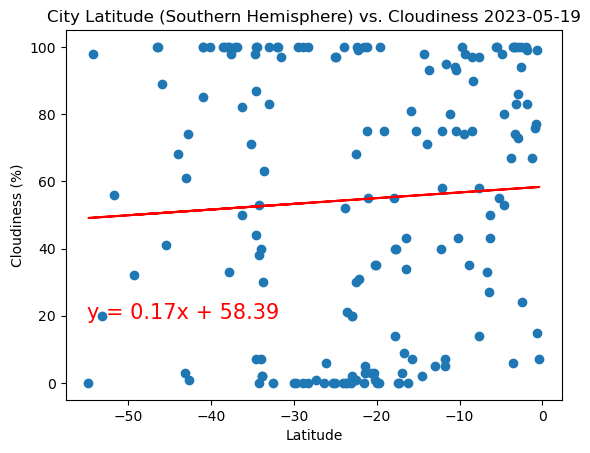

In [103]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regEQplotX = -55
regEQplotY = 19

# Label the y axis
y_label = 'Cloudiness (%)'
plt.title("City Latitude (Southern Hemisphere) vs. Cloudiness 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-55, 19), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig8.png")

# Show the plot
plt.show()

# **Discussion about the linear relationship:** 

The regression line for latitude vs. cloudiness, the latter expressed as a percentage, slopes very slightly upward for the both hemispheres, but with low absolute r values (i.e., only 0.01 for the nothern hemisphere and 0.06 for the southern hemisphere). This makes sense given the noticeably widely different values of the datapoints shown in the plots. Hence, there is little or no relationship between the variables. A future study might look at the relationship between humidity and cloudiness, given that clouds are composed of water vapor and both variables seem to be unaffected by an increase in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11379455676438426


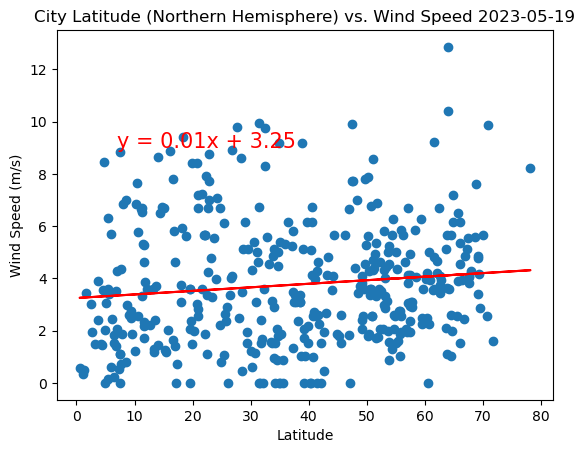

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

regEQplotX = 7
regEQplotY = 9

# Label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Northern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (7, 9), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig9.png")

# Show the plot
plt.show()

The r-value is: -0.09969047693610404


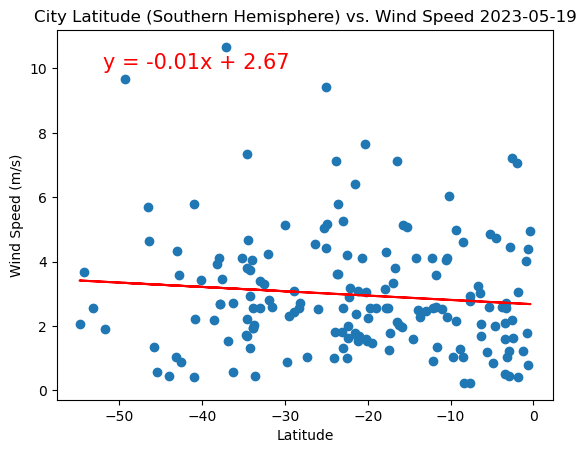

In [105]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# label the y axis
y_label = 'Wind Speed (m/s)'
plt.title("City Latitude (Southern Hemisphere) vs. Wind Speed 2023-05-19")
plt.grid(True)

# Run the function with all 5 variables and store the returned values
line_eq, r_squared = linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)

# Annotate the plot with line equation
plt.annotate(line_eq, (-52, 10), fontsize=15, color="red")

# Save the plot as a png to an output_data folder
plt.savefig("output_data/Fig10.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

As with cloudiness, wind speed (in m/s) almost holds relatively steady with increasing latitude in the northern hemisphere, with a barely positive line of best fit and a low (0.11) r score, while the southern hemisphere displays a mildly negative relationship with an absolutely higher, though still modest, Pearson's r of -0.11.

*On balance and as aforementioned, temperature is strongly correlated with changes in latitude and each hemisphere has its distinct pattern in this regard. The other variables in this study are practically unrelated to an increase in latitude, with the northern hemisphere in particular showing a particular lack of volatility.*